1. Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.

In [10]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

In [11]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
# Create *known* parameters
weight = 0.3
bias = 0.9

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")


Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [14]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

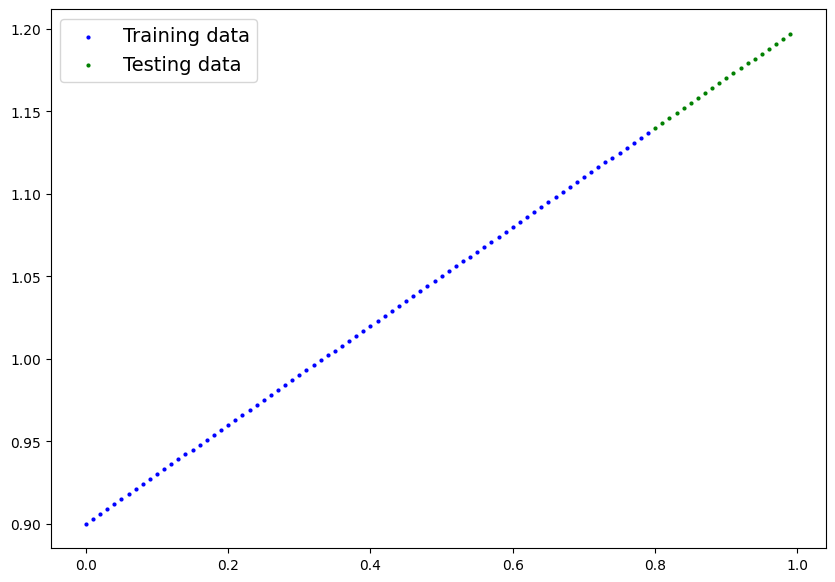

In [16]:
# Plot the training and testing data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions();

2. Build a PyTorch model by subclassing nn.Module.
Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [17]:
# Create a Linear Regression model class by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,  dtype=torch.float), requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x):
        return self.weights * x + self.bias

# Set manual seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()
model_0,model_0.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [18]:
# Instantiate the model and put it to the target device
model_0.to(device)
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.

In [34]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [20]:
torch.manual_seed(42)

# Number of epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
   ### Training


    # Put model in training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradient
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()


 ### Perform testing every 20 epochs
    if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context
        model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model_0(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(y_preds,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 1 | Train loss: 0.745 | Test loss: 0.711
Epoch: 2 | Train loss: 0.734 | Test loss: 0.698
Epoch: 3 | Train loss: 0.722 | Test loss: 0.684
Epoch: 4 | Train loss: 0.710 | Test loss: 0.671
Epoch: 5 | Train loss: 0.699 | Test loss: 0.657
Epoch: 6 | Train loss: 0.687 | Test loss: 0.644
Epoch: 7 | Train loss: 0.676 | Test loss: 0.630
Epoch: 8 | Train loss: 0.664 | Test loss: 0.617
Epoch: 9 | Train loss: 0.653 | Test loss: 0.603
Epoch: 10 | Train loss: 0.641 | Test loss: 0.589
Epoch: 11 | Train loss: 0.630 | Test loss: 0.576
Epoch: 12 | Train loss: 0.618 | Test loss: 0.562
Epoch: 13 | Train loss: 0.606 | Test loss: 0.549
Epoch: 14 | Train loss: 0.595 | Test loss: 0.535
Epoch: 15 | Train loss: 0.583 | Test loss: 0.522
Epoch: 16 | Train loss: 0.572 | Test loss: 0.508
Epoch: 17 | Train loss: 0.560 | Test loss: 0.495
Epoch: 18 | Train loss: 0.549 | Test loss: 0.481
Epoch: 19 | Train loss: 0.537 | Test loss: 0.468
Epoch: 20 | Train loss: 0.525 

4. Making predictions with the trained model on the test data.

In [27]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0')

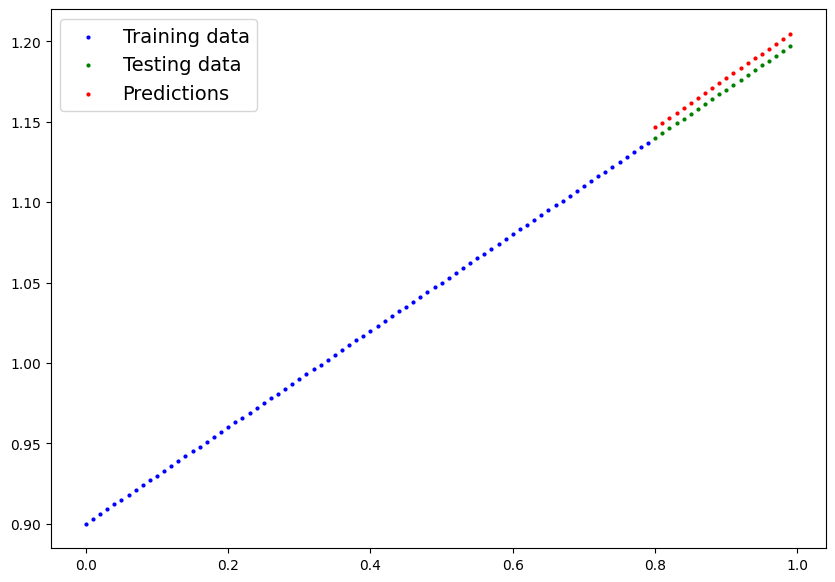

In [28]:
# Plot the predictions
plot_predictions(predictions = y_preds.cpu())

5. Save your trained model's state_dict() to file.

In [29]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [31]:
# Create new instance of model and load saved state dict
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.to(device)

<ipython-input-31-40321e77688d>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModel()

In [33]:
# Make predictions with loaded model and compare them to the previous
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')